In [3]:
# %load diag_H_atom.py
from scipy import *
from scipy.sparse import diags
from scipy.sparse.linalg import eigs
from ctypes import CDLL, c_double as CD, c_int as CI
from scipy.linalg import eigh_tridiagonal as eighT
from scipy.linalg import eig
import matplotlib 
from matplotlib import pyplot as plt 
cm2H =0.0000045563352812122295


def h_atom_stark(x0=1e-10, xend=30,N=1000, Lm=10,E=.000001, m=0, k=1, sigma=-1):

	### task parameter
	dx=(xend - x0)/N
	# print("N = ", N, "dx = ",dx)
	dx2=dx**2

#	R = linspace(x0,xend,N)

	A = []
	
	# print(type(es), type(dx))
	for L in range(m, Lm):
		A += [ 1/dx**2
		 - 1/(dx*ix + x0) +   L*(L+1)/ (2* (dx*ix+x0)**2) for ix in range(N) ]
		#A[-1] -= .5/dx**2 * exp(-1j*es*dx)
		#A[-N] -= .5/dx**2 * exp(-1e10*dx)

	A_off= -.5/dx**2 * ones( (Lm-m)*N ) 

	A_off[N-1::N] = 0 
	A_off = A_off[:-1]

	C = lambda l,m : sqrt( (l**2 - m**2 )/ (4*l**2 -1) )

	#####
	##
	## Note: if 
	##
	##
	# C_off = [-C(ll,m)* E*(x0+dx*ii) for ll in range(1,Lm) for ii in range(N)]   
	C_off = [-C(ll,m)* E*(x0+dx*ii) for ll in range(m+1,Lm) for ii in range(N)]   

	# H = diag(A) + diag(A_off,-1) + diag(A_off,1) + diag(C_off,N) + diag(C_off,-N)
	H = diags([A, A_off, A_off, C_off,C_off],[0,-1,1,N,-N], format="csc")
	return eigs(H , sigma = sigma, k=k)
	# return eigh(H.todense())

def test_qwall(e=-1-.1j):
	N = 100
	U = zeros(N)
	B= 40
	E = 60
	U[B:E] = 2e0
	dx = .1
	A = [ 1/dx**2 + U[ix] + 0j for ix in range(N) ]
	A_off= -.5/dx**2 * ones(N-1, dtype=complex128)

	ke = kb = sqrt(2*e)

	A[0] -= .5/dx**2 * exp(-kb*dx)
	A[N-1] -= .5/dx**2 * exp(-ke*dx)
	return eig( diags([A,A_off,A_off],[0,1,-1]).todense()) #, sigma= 500 , k=20)

#############################################################################
##
##  post processing
##

def post(energy,vecs, Lm=10, N=1000, k=35):
	v= [[ vecs[i*N:(i+1)*N,j] for i in range(Lm)] for j in range(k)]
	sum_v = [ [sum(v[j][i]) for i in range(Lm)] for j in range(k)]
	print("E\L     ", "        ".join(['s','p','d','f','k','l']))
	for i in  range(k):
		print("% 6.4f"% energy[i].real, end=" ")
		fmt = "{:-= 6.4f}  "* len(sum_v[i])
		print( fmt.format(*real(sum_v[i])) )
	return sum_v,v

##############################################################################
##
##  plot wave function
##
def plot1(v):
	e=0
	v,e = v
	plt.title("E = %f %f"%(e.real, e.imag))
	plt.plot( v[0] , 'r.')
	plt.plot( v[1] , 'y+')
	plt.plot( v[2] ),'g*'
	plt.plot( v[3] ),'bo'
	plt.plot( v[4] ),'v*'

	plt.show()

def plot2(v):
 	plt.plot(v[0].tolist() +  v[1].tolist() )
 	plt.show()

##
## end plot
##
#################################################################################



In [4]:
%matplotlib inline
from matplotlib import pyplot

E$=0.00001 a.u \approx 10^4\frac{V}{cm}$
<br>
$\pi-$ pulse $\approx 10^{12}Hz$ 

In [196]:
x0=1e-7
xend = 30
N = 1500

e,v = h_atom_stark(x0=x0, xend=xend,E=.00001,Lm=10,N=N,k=10,m=0)
e1,v1 = h_atom_stark(x0=x0, xend=xend,E=.00001,Lm=10,N=N,k=10,m=1)


In [197]:
e1,e

(array([-0.12500105+0.j, -0.05555281+0.j, -0.05544723+0.j, -0.03002129+0.j,
        -0.02796983+0.j, -0.02591208+0.j, -0.01388943+0.j, -0.00591477+0.j,
         0.00063733+0.j,  0.0022669 +0.j]),
 array([-0.49994501+0.j, -0.12502875+0.j, -0.12496856+0.j, -0.05557044+0.j,
        -0.05548766+0.j, -0.05536488+0.j, -0.03002153+0.j, -0.02797043+0.j,
        -0.02463083+0.j, -0.02591917+0.j]))

Energy diff  (-6.019073925045415e-05+0j)
time  (-1.0438790726651822e-12-0j) sec


/home/vit/miniconda3/envs/py3k/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


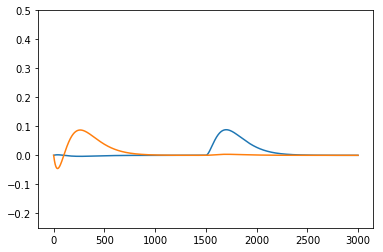

In [201]:
print('Energy diff ', e[1] - e[2])
print('time ', pi/(e[1] - e[2]) * 2*1e-17,'sec')
R = linspace(x0,xend,N)
R = array(R.tolist() + R.tolist())
pyplot.ylim([-.25,.5])
pyplot.plot((v[0:2*N,1] + v[0:2*N,2])) # 2s
pyplot.plot((v[0:2*N,1] - v[0:2*N,2])) # 2px


<h1>Conclusion</h1>
I am not sure that we can mix only 2 states (2(0,0) and 2(1,0) where (l,m)), but if we can and we have very strong electric field E$=0.00001 a.u \approx 10^4\frac{V}{cm}$ there will oscilation between mixed states with frequency $\approx 10^{12}Hz$
